In [128]:
#Initial imports 
import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell #Show all consecutive outputs
InteractiveShell.ast_node_interactivity = "all"

In [129]:
#Removes all unnecessary warnings by Python
import warnings
warnings.filterwarnings('ignore')

In [130]:
from collections import defaultdict
import scipy as sp
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (12, 8)
rcParams['figure.dpi'] = 250
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 3
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 25
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

In [131]:
#Show all the columns 
pd.set_option('display.max_columns',None)

In [132]:
#ROC CODE
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    for k in range(0, fpr.shape[0],labe):
        #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
        threshold = str(np.round(thresholds[k], 2))
        ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

In [133]:
df = pd.read_csv('mfexltr.csv') #merge

In [134]:
df.head()

,Account Number,Age,agehome,Churn,cardone,cardtwo,paper,Jan_pay,Feb_pay,Mar_pay,log_data_gb,Jan_hours,Feb_hours,Mar_hours,Jan_postlimit,Feb_postlimit,Mar_postlimit,Jan_def,Feb_def,Mar_def,Age_low,Age_med,Age_high,ILPS_Others,ILPS_ABC_BM,ILPS_TP,ILPS_PS_GI,ILPS_PS_Others,ILPS_SO,ILPS_U,ILT_ABC,ILT_Acc,ILT_TP,ILT_OC,ILT_Outbound,ILT_U_EA,ILT_U_AO3,year_diff__2.0,year_diff__3.0,month_diff__0.0,month_3,Sal_ch_low,Sal_ch_med,Sal_ch_high,Sch_ch_vlow,Sch_ch_low,Sch_ch_med,Sch_ch_high,prof_ntn,Female,Male,other,Closed,Open,Eastern,Northern,Southern,Western,BOUGHT,RENTED,Second Hand,INVALID,VALID,Full Year,Full Year Plus 3 Months,Three Full Years,IL_comb
0,M1,70.0,17,0,0,3,0,1209.810,1209.810,1209.810,5.576896,717.90,662.42,634.68,0,0,0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
1,M2,55.0,22,0,0,3,0,751.695,751.695,751.695,5.612398,696.12,652.40,495.77,5,0,0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,4
2,M3,64.0,17,0,0,3,0,1064.385,1064.385,1064.385,5.277349,737.62,531.47,743.73,0,0,0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0
3,M4,66.0,22,0,0,3,0,963.375,1674.750,1488.375,5.153292,743.23,669.10,598.20,0,0,0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
4,M5,47.5,12,0,0,3,0,839.895,919.590,856.695,2.923162,285.52,409.43,598.23,0,0,0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0


In [135]:
val = pd.read_csv('mfexltrv.csv')

In [136]:
val.head()

,Account Number,Age,agehome,cardone,cardtwo,paper,Jan_pay,Feb_pay,Mar_pay,log_data_gb,Jan_hours,Feb_hours,Mar_hours,Jan_postlimit,Feb_postlimit,Mar_postlimit,Jan_def,Feb_def,Mar_def,ILPS_TP,ILPS_PS_GI,ILPS_PS_Others,ILT_Acc,ILT_TP,ILT_OC,ILT_U_EA,ILT_U_AO3,year_diff__2.0,year_diff__3.0,month_diff__0.0,month_3,Sal_ch_low,Sal_ch_med,Sal_ch_high,Sch_ch_vlow,Sch_ch_low,Sch_ch_med,Sch_ch_high,prof_ntn,Female,Male,other,Closed,Eastern,Northern,Southern,Western,BOUGHT,RENTED,Three Full Years
0,V1,54.5,17,0,3,0,748.965,2061.465,748.965,5.444364,400.52,587.93,647.40,0,0,0,0.0,0.0,0.0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
1,V2,71.0,22,0,3,0,824.670,824.670,824.670,6.076495,699.75,658.43,656.05,232,35,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1
2,V3,69.0,22,0,3,0,839.895,839.895,839.895,6.314634,741.10,679.82,730.47,0,0,60,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1
3,V4,71.0,22,0,3,0,1212.015,1212.015,1212.015,5.344724,683.67,645.82,702.88,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1
4,V5,61.0,22,0,3,0,854.070,854.070,854.070,6.523048,742.82,718.52,733.88,0,0,194,0.0,0.0,713.4,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1


In [137]:
df.columns
val.columns

Index(['Account Number', 'Age', 'agehome', 'Churn', 'cardone', 'cardtwo',
       'paper', 'Jan_pay', 'Feb_pay', 'Mar_pay', 'log_data_gb', 'Jan_hours',
       'Feb_hours', 'Mar_hours', 'Jan_postlimit', 'Feb_postlimit',
       'Mar_postlimit', 'Jan_def', 'Feb_def', 'Mar_def', 'Age_low', 'Age_med',
       'Age_high', 'ILPS_Others', 'ILPS_ABC_BM', 'ILPS_TP', 'ILPS_PS_GI',
       'ILPS_PS_Others', 'ILPS_SO', 'ILPS_U', 'ILT_ABC', 'ILT_Acc', 'ILT_TP',
       'ILT_OC', 'ILT_Outbound', 'ILT_U_EA', 'ILT_U_AO3', 'year_diff__2.0',
       'year_diff__3.0', 'month_diff__0.0', 'month_3', 'Sal_ch_low',
       'Sal_ch_med', 'Sal_ch_high', 'Sch_ch_vlow', 'Sch_ch_low', 'Sch_ch_med',
       'Sch_ch_high', 'prof_ntn', 'Female', 'Male', 'other', 'Closed', 'Open',
       'Eastern', 'Northern', 'Southern', 'Western', 'BOUGHT', 'RENTED',
       'Second Hand', 'INVALID', 'VALID', 'Full Year',
       'Full Year Plus 3 Months', 'Three Full Years', 'IL_comb'],
      dtype='object')

Index(['Account Number', 'Age', 'agehome', 'cardone', 'cardtwo', 'paper',
       'Jan_pay', 'Feb_pay', 'Mar_pay', 'log_data_gb', 'Jan_hours',
       'Feb_hours', 'Mar_hours', 'Jan_postlimit', 'Feb_postlimit',
       'Mar_postlimit', 'Jan_def', 'Feb_def', 'Mar_def', 'ILPS_TP',
       'ILPS_PS_GI', 'ILPS_PS_Others', 'ILT_Acc', 'ILT_TP', 'ILT_OC',
       'ILT_U_EA', 'ILT_U_AO3', 'year_diff__2.0', 'year_diff__3.0',
       'month_diff__0.0', 'month_3', 'Sal_ch_low', 'Sal_ch_med', 'Sal_ch_high',
       'Sch_ch_vlow', 'Sch_ch_low', 'Sch_ch_med', 'Sch_ch_high', 'prof_ntn',
       'Female', 'Male', 'other', 'Closed', 'Eastern', 'Northern', 'Southern',
       'Western', 'BOUGHT', 'RENTED', 'Three Full Years'],
      dtype='object')

In [138]:
df.shape
val.shape

(9957, 67)

(4986, 50)

In [ ]:
#DELETING ALL THE CALL CENTRE LEVELS WHICH ARE OF NO USE

In [139]:
del df["ILPS_SO"]

In [140]:
del df['ILPS_U']

In [141]:
del df['ILPS_ABC_BM']

In [142]:
del df['Age_low']
del df['Age_med']
del df['Age_high']


In [143]:
del df['IL_comb']

In [144]:
del df['Full Year Plus 3 Months']
del df['Full Year']


In [145]:
del df['ILPS_Others']
del df['Open']

In [146]:
del df['VALID']
del df['INVALID']

In [147]:
del df['ILT_ABC']

In [148]:
del df["Second Hand"]

In [149]:
del df['ILT_Outbound']

In [150]:
from xgboost.sklearn import XGBClassifier
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


In [151]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Account Number','Churn'], axis=1),df['Churn'],stratify=df['Churn'],test_size=0.333,random_state=468)

In [156]:
y_train.to_csv("ytrainxgb.csv")

In [157]:
y_test.to_csv("ytestxgb.csv")

In [ ]:
#XGBOOST HYPERPARAMETERS TO DEAL WITH IMBALANCED DATA

In [159]:
xgb = XGBClassifier(n_estimators=150, objective='binary:logistic', silent=False,max_depth=4,scale_pos_weight=15.25,gamma=14.5,max_delta_step=0.70,seed=42,learning_rate=0.1,reg_alpha=1,min_child_weight=2)

In [160]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=14.5, learning_rate=0.1, max_delta_step=0.7, max_depth=4,
       min_child_weight=2, missing=None, n_estimators=150, nthread=-1,
       objective='binary:logistic', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=15.25, seed=42, silent=False, subsample=1)

In [161]:
pred_train = xgb.predict(x_train)

In [162]:
accuracy_score(y_train,pred_train)

0.91552477036590874

In [163]:
pred_test = xgb.predict(x_test)

In [164]:
accuracy_score(y_test,pred_test)

0.87756332931242464

In [204]:
cross_val_score(xgb,x_train,y_train,cv=5)

array([ 0.88562829,  0.89390519,  0.89457831,  0.88027108,  0.88771665])

In [206]:
cross_val_score(xgb,x_test,y_test,cv=5).mean()

0.87968378963489668

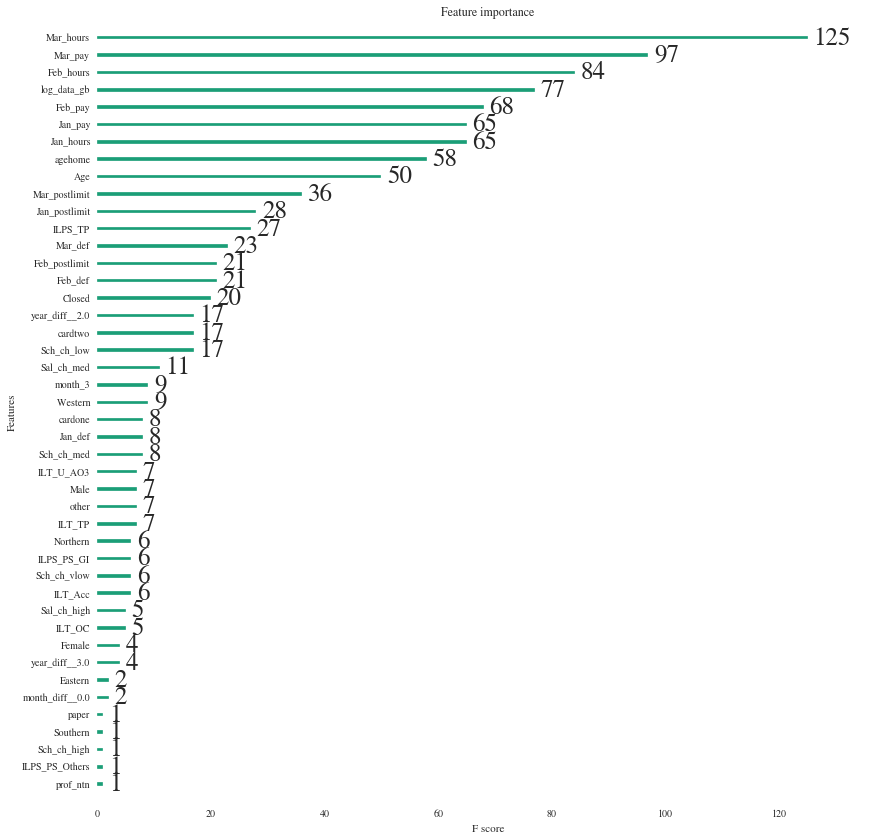

In [165]:
from xgboost import plot_importance
rcParams['figure.figsize'] = (14, 14)
plot_importance(xgb)

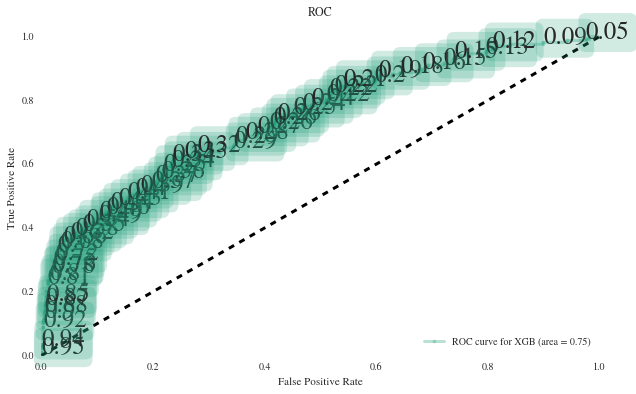

In [202]:
make_roc("XGB",xgb,y_test,x_test,labe=5)
rcParams['figure.figsize'] = (8, 6)

In [167]:
from sklearn.metrics import f1_score
f1_score(y_test,pred_test)


0.25912408759124084

In [168]:
#Predicting probabilities
pred1 = xgb.predict_proba(x_train)
pred2 = xgb.predict_proba(x_test)

In [169]:
px2 = pred1.reshape((-1,2))
px3 = pd.DataFrame({'R':px2[:,0],"S":px2[:,1]})
px4 = pred2.reshape((-1,2))
px5 = pd.DataFrame({'R':px4[:,0],"S":px4[:,1]})

In [170]:
px3.to_csv("trexl.csv",index=False)

In [171]:
px5.to_csv("teexl.csv",index=False)

In [172]:
trexl = pd.read_csv('trexl.csv')

In [174]:
teexl = pd.read_csv('teexl.csv')

In [176]:
trexl.head()

,R,S,Churn,c46,c53,c60,c65,c69
0,0.479767,0.520233,0,1,0,0,0,0
1,0.832618,0.167382,0,0,0,0,0,0
2,0.781257,0.218743,0,0,0,0,0,0
3,0.814808,0.185192,0,0,0,0,0,0
4,0.948467,0.051533,0,0,0,0,0,0


In [177]:
#Analyzing different cutoffs using Crosstab value
pd.crosstab(trexl['Churn'],trexl['c46'])
pd.crosstab(trexl['Churn'],trexl['c53'])
pd.crosstab(trexl['Churn'],trexl['c60'])
pd.crosstab(trexl['Churn'],trexl['c65'])
pd.crosstab(trexl['Churn'],trexl['c69'])

c46,0,1
Churn,,
0,5734,570
1,52,285


c53,0,1
Churn,,
0,5897,407
1,93,244


c60,0,1
Churn,,
0,6021,283
1,115,222


c65,0,1
Churn,,
0,6097,207
1,138,199


c69,0,1
Churn,,
0,6153,151
1,154,183


In [178]:
pd.crosstab(teexl['Churn'],teexl['c46'])
pd.crosstab(teexl['Churn'],teexl['c53'])
pd.crosstab(teexl['Churn'],teexl['c60'])
pd.crosstab(teexl['Churn'],teexl['c65'])
pd.crosstab(teexl['Churn'],teexl['c69'])

c46,0,1
Churn,,
0,2785,362
1,94,75


c53,0,1
Churn,,
0,2886,261
1,100,69


c60,0,1
Churn,,
0,2966,181
1,107,62


c65,0,1
Churn,,
0,3022,125
1,109,60


c69,0,1
Churn,,
0,3048,99
1,113,56


In [80]:
y_train.shape

(6641,)

In [180]:
a = val['Account Number']
del val['Account Number']

In [183]:
finale = xgb.predict(val)

In [197]:
val.shape

(4986, 49)

In [185]:
finaleprob = xgb.predict_proba(val)

In [199]:
p2 = xgb.predict_proba(val)
px9 = finaleprob.reshape((-1,2))
px10 = pd.DataFrame({'R':px9[:,0],"S":px9[:,1]})

In [200]:
px10.to_csv("finallyabsahihai.csv",index=False)

In [188]:
px7 = finaleprob.reshape((-1,2))
px8 = pd.DataFrame({'R':px2[:,0],"S":px2[:,1]})

In [189]:
px8.to_csv("finaleprediction.csv",index=False)

In [191]:
px8.shape

(6641, 2)